<a href="https://colab.research.google.com/github/HGF-AA/Python/blob/main/Countries_to_Live_In(Graphs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from google.colab import drive

import pandas as pd
import io

drive.mount ('/content/drive')


Mounted at /content/drive


In [ ]:
df_costofliving = pd.read_csv('/content/drive/MyDrive/Cost_of_Living_Index_by_Country_2024.csv')

df_crimeindex = pd.read_csv('/content/drive/MyDrive/crime_rankings_2024.csv')

data = pd.merge(df_costofliving, df_crimeindex, left_on='Country', right_on='country', how='left')
data.head(5)


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,rank,country,safety_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,130.0,Switzerland,74.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,35.0,Bahamas,43.5
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,129.0,Iceland,74.6
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,137.0,Singapore,76.5
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,67.0,Barbados,52.9


In [ ]:
# prompt: rename safety_index column to safety score

data = data.rename(columns={'safety_index': 'safety_score'})
data.head(10)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:

# prompt: generate a bar graph with the most expensive countries to live in

# Sort the DataFrame by 'Cost of Living Index' in descending order
data_sorted = data.sort_values(by=['Cost of Living Index'], ascending=False)

# Create a bar graph of the 10 most expensive countries
top_10_expensive = data_sorted.head(10)
print("Top 10 Most Expensive Countries:")
print(top_10_expensive[['Country', 'Cost of Living Index']])

# Create a bar graph using plotly.express
fig = px.bar(top_10_expensive, x='Country', y='Cost of Living Index',
             title='Top 10 Most Expensive Countries to Live in')
fig.show()


Top 10 Most Expensive Countries:
             Country  Cost of Living Index
0        Switzerland                 101.1
1            Bahamas                  85.0
2            Iceland                  83.0
3          Singapore                  76.7
4           Barbados                  76.6
5             Norway                  76.0
6            Denmark                  72.3
7  Hong Kong (China)                  70.8
8      United States                  70.4
9          Australia                  70.2


In [ ]:
# prompt: generate a bar graph with the least expensive countries to live in, in descending order

# Sort the DataFrame by 'Cost of Living Index' in ascending order
data_sorted_ascending = data.sort_values(by=['Cost of Living Index'], ascending=True)

# Create a bar graph of the 10 least expensive countries
bottom_10_expensive = data_sorted_ascending.head(10)
print("\nBottom 10 Least Expensive Countries:")
print(bottom_10_expensive[['Country', 'Cost of Living Index']])

# Create a bar graph using plotly.express
fig = px.bar(bottom_10_expensive, x='Country', y='Cost of Living Index',
             title='Bottom 10 Least Expensive Countries to Live in',
             labels={'Cost of Living Index': 'Cost of Living Index'},
             text='Cost of Living Index') # Add text labels for better readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') # Format text labels
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') # Ensure text visibility
fig.show()



Bottom 10 Least Expensive Countries:
        Country  Cost of Living Index
120    Pakistan                  18.8
119       Libya                  20.4
118       Egypt                  21.0
117       India                  21.2
116  Bangladesh                  22.5
115    Tanzania                  23.8
114       Syria                  24.0
113  Madagascar                  24.5
112    Paraguay                  25.4
111       Nepal                  25.5


In [ ]:
# prompt: give me the top 10 countries with the highest safety_score

# Sort the DataFrame by 'safety_score' in descending order
data_sorted_safety = data.sort_values(by=['safety_score'], ascending=False)

# Create a bar graph of the 10 countries with the highest safety_score
top_10_safest = data_sorted_safety.head(10)
print("\nTop 10 Safest Countries:")
print(top_10_safest[['Country', 'safety_score']])

# Create a bar graph using plotly.express
fig = px.bar(top_10_safest, x='Country', y='safety_score',
             title='Top 10 Safest Countries',
             labels={'safety_score': 'Safety Score'},
             text='safety_score') # Add text labels for better readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') # Format text labels
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') # Ensure text visibility
fig.show()



Top 10 Safest Countries:
                 Country  safety_score
26  United Arab Emirates          84.4
36                 Qatar          84.0
48                Taiwan          83.3
50                  Oman          81.0
7      Hong Kong (China)          78.2
57               Armenia          77.6
45                 Japan          77.4
3              Singapore          76.5
35               Estonia          76.2
33               Bahrain          76.1


In [ ]:
# prompt: give me the top 10 countries with the lowest safety_score

# Sort the DataFrame by 'safety_score' in ascending order
data_sorted_safety_ascending = data.sort_values(by=['safety_score'], ascending=True)

# Create a bar graph of the 10 countries with the lowest safety_score
bottom_10_safest = data_sorted_safety_ascending.head(10)
print("\nBottom 10 Least Safest Countries:")
print(bottom_10_safest[['Country', 'safety_score']])

# Create a bar graph using plotly.express
fig = px.bar(bottom_10_safest, x='Country', y='safety_score',
             title='Bottom 10 Least Safest Countries',
             labels={'safety_score': 'Safety Score'},
             text='safety_score') # Add text labels for better readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') # Format text labels
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') # Ensure text visibility
fig.show()



Bottom 10 Least Safest Countries:
                 Country  safety_score
64             Venezuela          18.8
77          South Africa          24.6
31   Trinidad And Tobago          29.2
114                Syria          30.9
29               Jamaica          31.9
94                  Peru          32.2
85               Nigeria          33.8
90                Brazil          34.4
104              Bolivia          35.4
97             Argentina          35.8


In [ ]:
# prompt: generate me a map with all the countries based on safety_score, going from red with the lowest safety_score to green with the highest safety_score

import plotly.express as px

fig = px.choropleth(data, locations="Country",
                    locationmode='country names',
                    color="safety_score",
                    hover_name="Country",
                    color_continuous_scale="RdYlGn", # Red to Green scale
                    title="Safety Score by Country")
fig.show()


In [ ]:
# prompt: generate me a map with all the countries based on Cost of Living Plus Rent Index, going from red with the highest to green with the lowest

import plotly.express as px

fig = px.choropleth(data, locations="Country",
                    locationmode='country names',
                    color="Cost of Living Index",
                    hover_name="Country",
                    color_continuous_scale="RdYlGn_r", # Red to Green scale reversed for highest cost in red
                    title="Cost of Living Plus Rent Index by Country")
fig.show()


In [ ]:
# prompt: generate a scatter plot graph showing countries with the highest safety_score and lowest Cost of Living Plus Rent Index

import plotly.express as px

# Assuming 'data' DataFrame is already created as in your provided code

# Sort the DataFrame by safety_score in descending order and Cost of Living Plus Rent Index in ascending order
data_sorted = data.sort_values(by=['safety_score', 'Cost of Living Index'], ascending=[False, True])

# Select the top N countries for visualization (adjust N as needed)
top_n_countries = data_sorted.head(20)  # Example: Top 20 countries

# Create the scatter plot
fig = px.scatter(top_n_countries,
                 x='safety_score',
                 y='Cost of Living Index',
                 color='Country',
                 hover_data=['Country'],
                 title='Countries with Highest Safety Score and Lowest Cost of Living',
                 labels={'safety_score': 'Safety Score', 'Cost of Living Index': 'Cost of Living Plus Rent Index'})

fig.show()


In [ ]:
# prompt: generate a bar graph with the top 10 countries with the highest Restaurant Price Index

# Sort the DataFrame by 'Restaurant Price Index' in descending order
data_sorted_restaurant = data.sort_values(by=['Restaurant Price Index'], ascending=False) # Added this line to define and sort the DataFrame

# Create a bar graph of the 10 countries with the highest Restaurant Price Index
top_10_restaurant = data_sorted_restaurant.head(10)
print("\nTop 10 Countries with Highest Restaurant Price Index:")
print(top_10_restaurant[['Country', 'Restaurant Price Index']])

# Create a bar graph using plotly.express
fig = px.bar(top_10_restaurant, x='Country', y='Restaurant Price Index',
             title='Top 10 Countries with Highest Restaurant Price Index',
             labels={'Restaurant Price Index': 'Restaurant Price Index'},
             text='Restaurant Price Index') # Add text labels for better readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') # Format text labels
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') # Ensure text visibility
fig.show()


Top 10 Countries with Highest Restaurant Price Index:
          Country  Restaurant Price Index
0     Switzerland                    97.0
2         Iceland                    86.8
1         Bahamas                    83.3
6         Denmark                    81.3
5          Norway                    73.5
4        Barbados                    69.4
19     Luxembourg                    68.7
18         Israel                    68.0
8   United States                    67.2
22        Belgium                    66.0


In [ ]:
import plotly.express as px

# Assuming 'continent_cost' DataFrame is already created as in your provided code

# Create the bar chart with a green-to-red color scale
fig = px.bar(continent_cost,
             x='Continent',
             y='Cost of Living Index',
             title='Average Cost of Living Index by Continent',
             labels={'Cost of Living Index': 'Average Cost of Living Index',
                     'Continent': 'Continent'},
             text='Cost of Living Index',  # Add text labels for better readability
             color='Cost of Living Index',  # Use Cost of Living Index for color
             color_continuous_scale='RdYlGn_r')  # Green to Red color scale

# Format text labels and ensure visibility
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Display the plot
fig.show()


In [ ]:
# Install the required library
# Uncomment the line below if `pycountry_convert` is not already installed
# !pip install pycountry_convert

import pycountry_convert as pc
import pandas as pd
import plotly.express as px

# Function to get continent code from country name
def get_continent(country):
    try:
        # Special handling for South America
        south_america_countries = [
            'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
            'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
            'Uruguay', 'Venezuela'
        ]
        if country in south_america_countries:
            return 'South America'

        # Use pycountry_convert for other continents
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        # Convert pycountry continent codes to readable names
        continent_map = {
            'NA': 'North America',
            'SA': 'South America',
            'EU': 'Europe',
            'AF': 'Africa',
            'AS': 'Asia',
            'OC': 'Oceania'
        }
        return continent_map.get(continent_code, None)
    except KeyError:
        return None

# Example DataFrame (Replace with your actual dataset)
data = pd.DataFrame({
    'Country': ['United States', 'France', 'India', 'South Africa', 'Australia', 'Brazil', 'Argentina'],
    'safety_score': [85.4, 92.1, 58.7, 45.2, 89.3, 70.1, 75.3]
})

# Apply the function to create a new 'Continent' column
data['Continent'] = data['Country'].apply(get_continent)

# Remove rows with missing continent data
data.dropna(subset=['Continent'], inplace=True)

# Group by continent and get the mean safety score
continent_safety = data.groupby('Continent')['safety_score'].mean().reset_index()

# Sort by safety score in descending order
continent_safety = continent_safety.sort_values(by='safety_score', ascending=False)

# Create the bar chart
fig = px.bar(
    continent_safety,
    x='Continent',
    y='safety_score',
    title='Average Safety Score by Continent',
    labels={'safety_score': 'Average Safety Score', 'Continent': 'Continent'},
    text='safety_score',
    color='safety_score',  # Color bars based on safety score
    color_continuous_scale="RdYlGn"  # Use red-yellow-green color scale
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Show the chart
fig.show()



In [ ]:
# prompt: remove "unknown"

# ... (Your existing code)

# Function to get continent code from country name
def get_continent(country):
  try:
    country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    return continent_code
  except KeyError:
    # Handle cases where country name is not found
    return None  # Return None instead of 'Unknown'

# Apply the function to create a new 'Continent' column
data['Continent'] = data['Country'].apply(get_continent)

# Remove rows where the continent is unknown
data = data.dropna(subset=['Continent'])

# Now you can proceed with your groupby operation
continent_cost = data.groupby('Continent')['Cost of Living Index'].mean().reset_index()

In [ ]:
# prompt: generate correlation matrix showing countries with the highest safety_score and lowest Cost of Living Plus Rent Index

# Select relevant columns for correlation (exclude 'Country' for correlation calculation)
correlation_data = data[['safety_score', 'Cost of Living Index']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

print(correlation_matrix)

# Find countries with highest safety_score and lowest Cost of Living Index
# (You can adjust the number of countries to display as needed)
top_countries = data.sort_values(by=['safety_score', 'Cost of Living Index'], ascending=[False, True]).head(10)

print("\nTop Countries (High Safety, Low Cost):")
print(top_countries[['Country', 'safety_score', 'Cost of Living Index']])

NameError: name 'data' is not defined

In [ ]:
# prompt: check for duplicates and unknown values, or NA

# Check for duplicates
duplicates = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# Check for unknown or NA values
missing_values = data.isnull().sum()
print("\nMissing Values:")
missing_values

Duplicate Rows:
Empty DataFrame
Columns: [Rank, Country, Cost of Living Index, Rent Index, Cost of Living Plus Rent Index, Groceries Index, Restaurant Price Index, Local Purchasing Power Index, rank, country, safety_score, Continent]
Index: []

Missing Values:


,0
Rank,0
Country,0
Cost of Living Index,0
Rent Index,0
Cost of Living Plus Rent Index,0
Groceries Index,0
Restaurant Price Index,0
Local Purchasing Power Index,0
rank,1
country,1


In [ ]:
# prompt: make title columns in lower case

# Convert all column names to lowercase
data.columns = map(str.lower, data.columns)
data.head(10)

,rank,country,cost of living index,rent index,cost of living plus rent index,groceries index,restaurant price index,local purchasing power index,rank,country,safety_score,continent
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,130.0,Switzerland,74.7,EU
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,35.0,Bahamas,43.5,NA
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,129.0,Iceland,74.6,EU
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,137.0,Singapore,76.5,AS
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,67.0,Barbados,52.9,NA
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7,111.0,Norway,67.4,EU
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2,125.0,Denmark,73.7,EU
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3,58.0,United States,50.7,NA
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4,66.0,Australia,52.9,OC
10,11,Austria,65.1,22.5,44.7,66.4,59.3,102.4,120.0,Austria,70.7,EU


In [ ]:
# prompt: remove the rank column

# Assuming 'data' DataFrame is already created as in your provided code

# Remove the 'rank' column if it exists
if 'rank' in data.columns:
    data = data.drop('rank', axis=1)
data.head(10)
# Now you can proceed with the rest of your code
# ... (Your existing code)

,country,cost of living index,rent index,cost of living plus rent index,groceries index,restaurant price index,local purchasing power index,country,safety_score,continent
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,Switzerland,74.7,EU
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,Bahamas,43.5,NA
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,Iceland,74.6,EU
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,Singapore,76.5,AS
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,Barbados,52.9,NA
5,Norway,76.0,26.2,52.1,79.0,73.5,114.7,Norway,67.4,EU
6,Denmark,72.3,26.4,50.2,64.8,81.3,127.2,Denmark,73.7,EU
8,United States,70.4,41.7,56.6,75.0,67.2,142.3,United States,50.7,NA
9,Australia,70.2,33.4,52.5,77.3,62.5,127.4,Australia,52.9,OC
10,Austria,65.1,22.5,44.7,66.4,59.3,102.4,Austria,70.7,EU


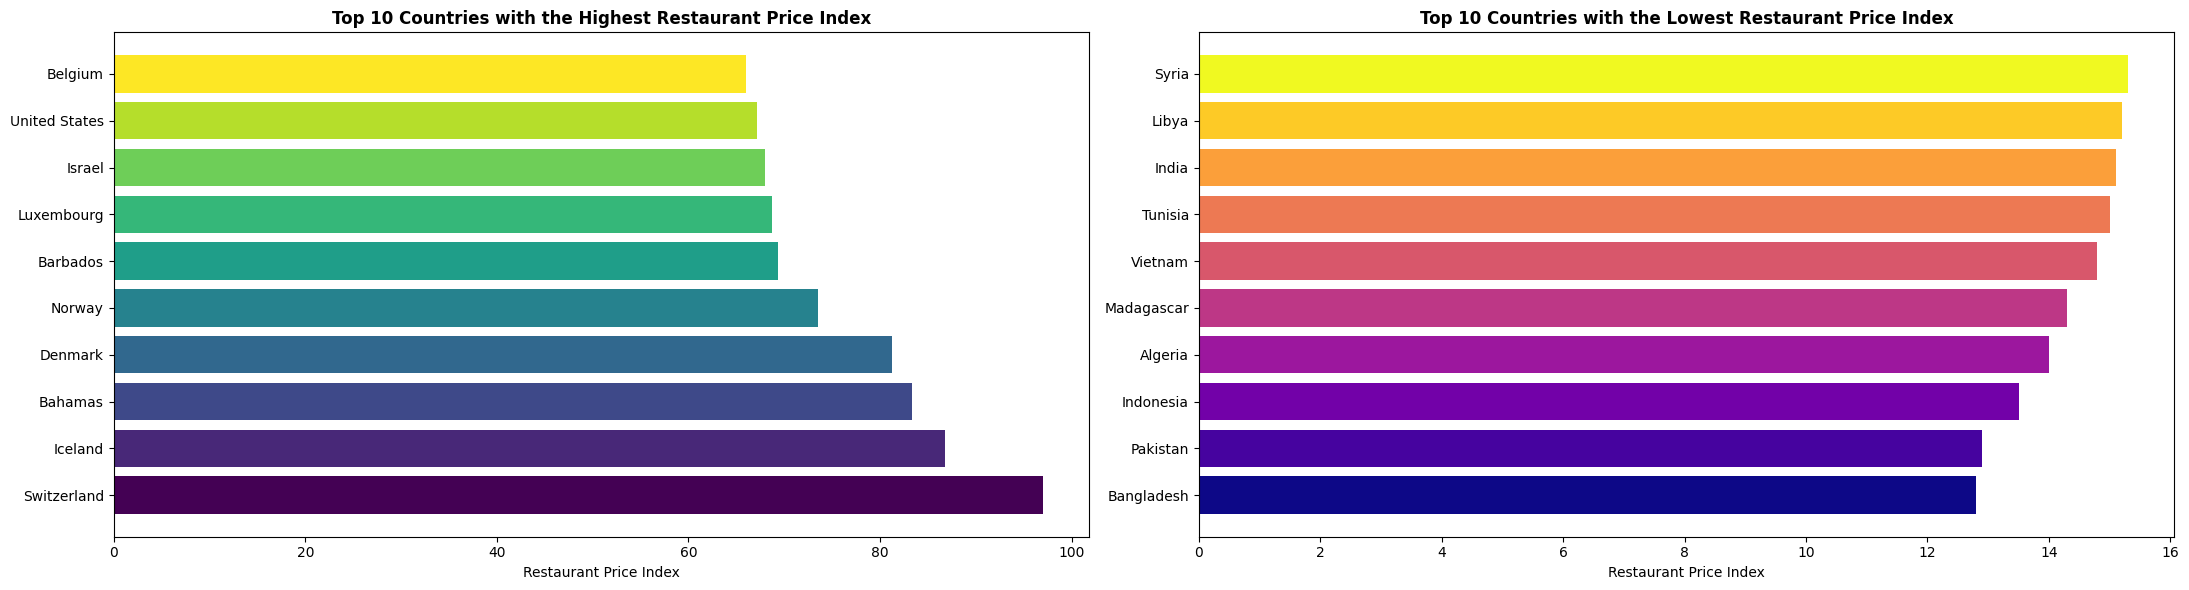

In [ ]:
# Sort the DataFrame by Local Purchasing Power Index for highest and lowest
data_sorted_high_price_restaurant = data_sorted.sort_values(by='Restaurant Price Index', ascending=False)
data_sorted_low_price_restaurant = data_sorted.sort_values(by='Restaurant Price Index', ascending=True)

# Get the top 10 countries with the highest local purchasing power index
top_10_Highest_Restaurant_Price_Index = data_sorted_high_price_restaurant.head(10)

# Get the top 10 countries with the lowest local purchasing power index
top_10_Lowest_Restaurant_Price_Index = data_sorted_low_price_restaurant.head(10)

# Data for countries with the highest local purchasing power index
countries_high = top_10_Highest_Restaurant_Price_Index['Country'].tolist()
indices_high = top_10_Highest_Restaurant_Price_Index['Restaurant Price Index'].tolist()

# Colors using the viridis palette
colors_high = plt.cm.viridis(np.linspace(0, 1, len(countries_high)))

# Data for countries with the lowest local purchasing power index
countries_low = top_10_Lowest_Restaurant_Price_Index['Country'].tolist()
indices_low = top_10_Lowest_Restaurant_Price_Index['Restaurant Price Index'].tolist()

# Colors using the plasma palette
colors_low = plt.cm.plasma(np.linspace(0, 1, len(countries_low)))

# Create the figure and subplots
plt.figure(figsize=(22, 6))
# Bar chart for highest local purchasing power index
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first chart
plt.barh(countries_high, indices_high, color=colors_high)
plt.xlabel('Restaurant Price Index')  # Label in English
plt.title('Top 10 Countries with the Highest Restaurant Price Index', fontsize=12, fontweight='bold')

# Bar chart for lowest local purchasing power index
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second chart
plt.barh(countries_low, indices_low, color=colors_low)
plt.xlabel('Restaurant Price Index')  # Label in English
plt.title('Top 10 Countries with the Lowest Restaurant Price Index', fontsize=12, fontweight='bold')

plt.tight_layout()  # Adjust the space between the charts
plt.show()

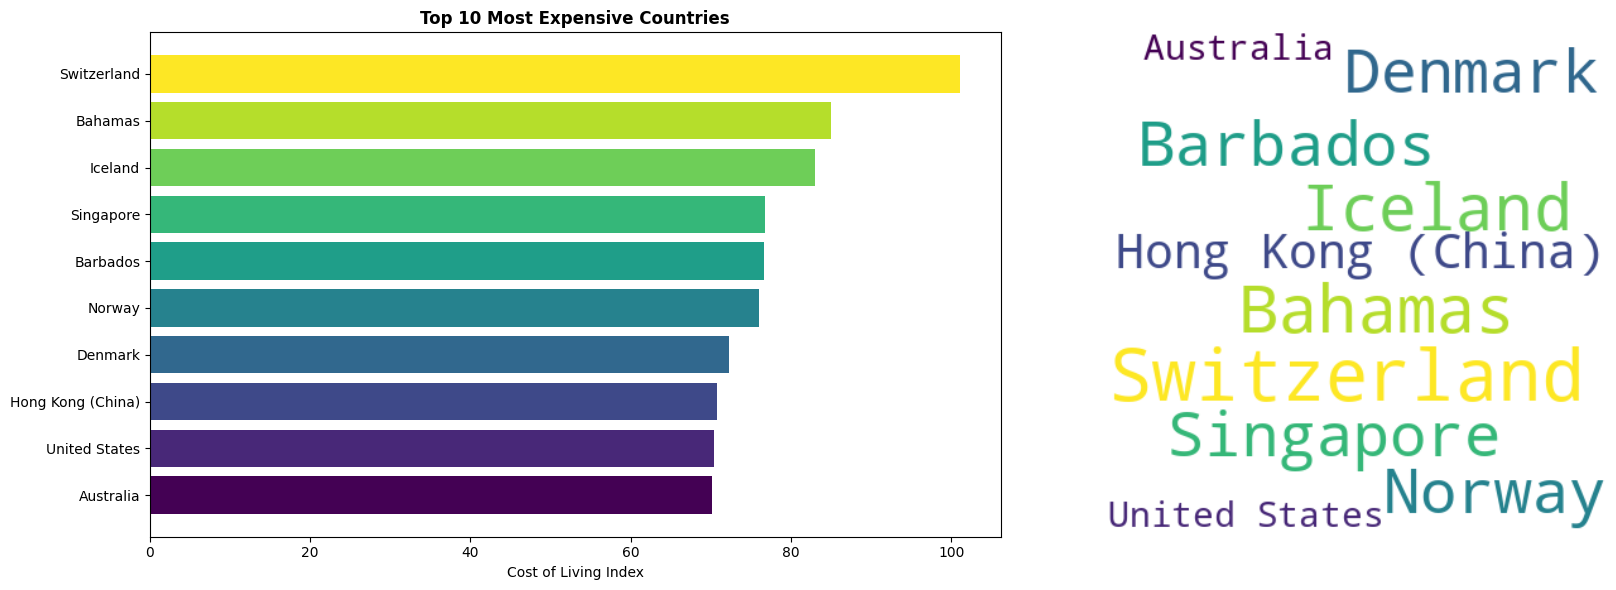

In [ ]:
# Create a bar chart + word cloud of most expensive countries
countries = top_10_expensive['Country'].tolist()
indices = top_10_expensive['Cost of Living Index'].tolist()

countries = countries[::-1]  # Reverses the order of the list of countries
indices = indices[::-1]      # Reverses the order of the list of indices

# Create a dictionary for word cloud frequencies
word_freq = {country: index for country, index in zip(countries, indices)}

# Generate colors using viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))

# Create a color mapping dictionary
color_dict = {country: colors[i] for i, country in enumerate(countries)}

# Convert colors to tuples of integers
color_dict_int = {country: (int(color[0]*255), int(color[1]*255), int(color[2]*255)) for country, color in color_dict.items()}

# Generate the bar chart
plt.figure(figsize=(18, 6))

# Generate subplot for bar chart
plt.subplot(1, 2, 1)
plt.barh(countries, indices, color=colors)
plt.xlabel('Cost of Living Index')
plt.title('Top 10 Most Expensive Countries', fontsize=12, fontweight='bold')

# Generate subplot for word cloud
plt.subplot(1, 2, 2)

# Custom color function for word cloud
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return color_dict_int.get(word, (0, 0, 0))  # Default to black if country not found

# Generate the word cloud
wordcloud = WordCloud(width=400, height=400, background_color='white',
                      color_func=custom_color_func).generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Display the bar chart + word cloud
plt.tight_layout()
plt.show()